### Project: Glass Identification

### Intern Name: Lakshminarayanareddy Marapareddygarihanumanthu
### Internship Number: DS2405

### Problem Statement/Description

The dataset describes the chemical properties of glass and involves classifying samples of
glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by
criminological investigation. At the scene of the crime, the glass left can be used as
evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-
1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)

1- building_windows_float_processed
2- building_windows_non_float_processed
3- vehicle_windows_float_processed
4- vehicle_windows_non_float_processed (none in this database)
5- containers
6- tableware
7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass
(classes 1-4) and non-window glass (classes 5-7).

Statement: Predicting type of glass that is whether it is window type or non-window type glass.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the data set
df = pd.read_csv("glass.csv", header = None)
df.columns = ["Id number", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type of glass"]
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.head(8)

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1


In [4]:
df.tail(8)

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
206,207,1.51645,14.94,0.0,1.87,73.11,0.00,8.67,1.38,0.0,7
207,208,1.51831,14.39,0.0,1.82,72.86,1.41,6.47,2.88,0.0,7
208,209,1.51640,14.37,0.0,2.74,72.85,0.00,9.45,0.54,0.0,7
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [5]:
# Checking the dimension of the data set
df.shape

(214, 11)

In [6]:
# Checking the names of columns in the data set
df.columns

Index(['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')

In [7]:
# Checking data types of each columns in the data set
df.dtypes

Id number          int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass      int64
dtype: object

#### Observation about the "glass.csv" data set:

The data set contains 214 records and 11 columns.Except column "ID number", all other columns represent measured chemical compositions as the weight percent in corresponding oxide and these are the main features in deciding type of glass. Further, we can see that all columns are numeric type (int 64 or float 64). Here Type of glass is the target and all other features are independent.

Target label "Type of glass" have 7 different type of glasses denoted by 1, 2, 3, 4, 5, 6,a and 7, but following the problem description we put them into two categories namely, window glass consists of 1, 2, 3, and 4 classes and non-window glass consists of 5, 6, and 7 classes. Hence, the target variable "Type of glass" finally contains two categorical values window or non-window. The problem will be termed as "Classification Problem" where we need to predict the Type of glass is window or non-window using classfication models.

### Exploratory Data Analysis (EDA) or Data Understanding

#### Dealing with missing values (None, NaN and others) and Cleaning the data set

In [8]:
# Checking for null or missing values present in any of the column
df.isnull().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

<AxesSubplot:>

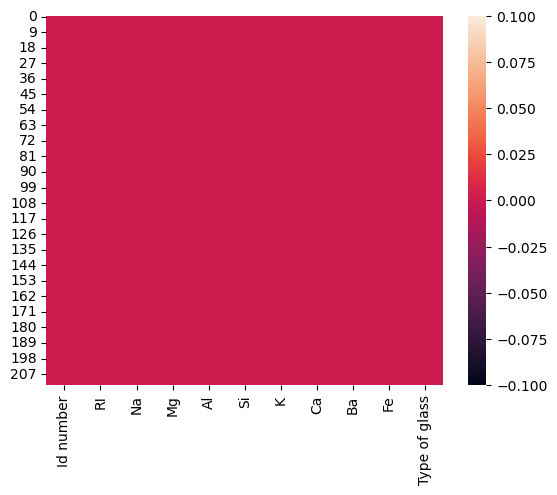

In [9]:
# Lets visualize missing values in each column by heatmap
sns.heatmap(df.isnull())

In [10]:
# Simple way to get overveiw about the data set (indexing, null values and data types of columns, memory, etc.) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


From the above we can observe that there are no missing or null values present in the data set. 

In [11]:
# List of unique values in the column
df['Type of glass'].unique()

array([1, 2, 3, 5, 6, 7])

From the above we can observe that the data set does not contain class 4- vehicle_windows_non_float_processed type of glass data. So, we will have classes 1,2 and 3 belongs to window type and classes 5, 6, and 7 belongs to non-window. 

In [12]:
# checking the value counts of 'TotalCharges' column
df['Type of glass'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

In [13]:
# checking the value counts of every column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

1      1
135    1
137    1
138    1
139    1
      ..
75     1
76     1
77     1
78     1
214    1
Name: Id number, Length: 214, dtype: int64


1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64


13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64


0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64


1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al, Length: 118, dtype: int64


72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64


0.00    30
0.57    12
0.56    11
0.60    11
0.58   

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [15]:
#  Checking number of unique values in each column
df.nunique().to_frame("No. of unique values")

,No. of unique values
Id number,214
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32


### Feature selection

Here we can notice that data set contains 214 records and the column "Id number" has 214 unique different values. So, removing "Id number" feature from the data set does not inluence the target label. Hence, here we drop the column "Id number" as part of feature selection. 

In [16]:
# Droping Id number column
df.drop("Id number", axis = 1, inplace = True)

In [17]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### Statistical Description of the Data Set 

In [18]:
# Statistical summary of numerical columns
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


This provides the statistical information about the numerical columns of the data set. The summary looks perfect since there are no negative/ invalid values present.

Observations from the above Statistical description:

1. Count value is same for all columns which means there are no missing values in the data set 

2. The mean value is greater than the median (50%) value in columns Al, Ca, Ba and Fe, which means that the data distribution is skewed towards right in these columns.

3. The mean value is less than the median (50%) value in columns Mg and K which means that the data distribution is skewed towards left in this columns.

4. The mean and median values are almost concide in columns Ri, Na, and Si which means the data distribution is almost normal in these two columns.

5. By summarizing the data we can observe that there are huge differences between 75% and max values (compares to differences between 50% to 75%) hence there may be possibility of outliers present in the data.

6. We can also notice that Standard deviation, min, 25% percentile values for numerical columns from the describe method.

## Data Visualization

### Univariate Analysis

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64


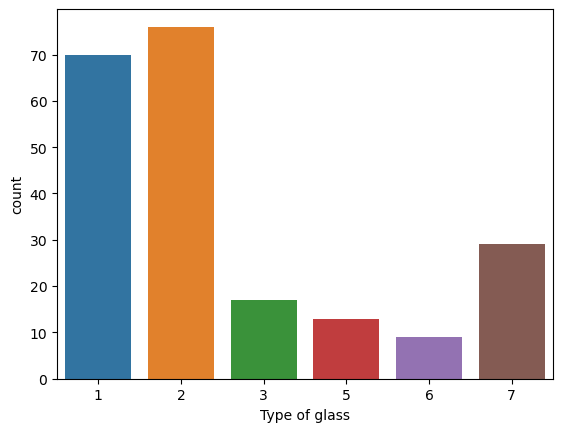

In [19]:
# Visualize the count of target variable quality
print(df["Type of glass"].value_counts())
ax = sns.countplot(x = "Type of glass", data = df)

#### From the univariate analysis, we can observe that the "Classes from 5 to 7" count is very less compared to the count of "Classes up to 4". i.e, there are more number of window type glasses than non-window type glasses in the data set. This leads to class imbalance issue in the data. We will rectify it by using oversampling method in later part.

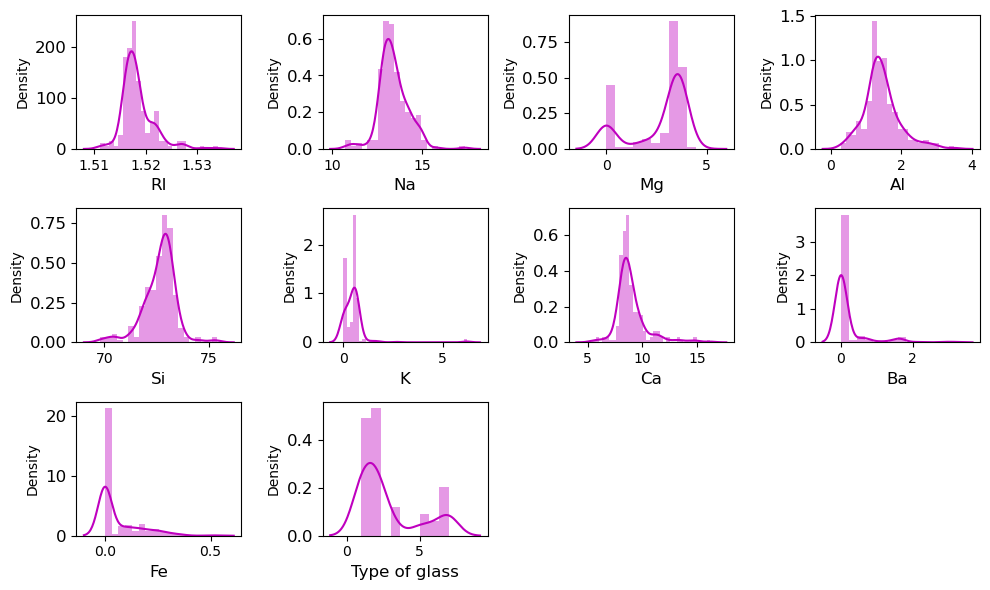

In [20]:
# Let's check how the data gas been distributed for each column
plt.figure(figsize = (10,6), facecolor = "white")
plotnumber = 1

for col in df.columns:
    if plotnumber <= 10:
        ax = plt.subplot(3,4, plotnumber)
        sns.distplot(df[col], color = "m")
        plt.xlabel(col, fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 12)
    plotnumber += 1
    
plt.tight_layout()

From the above distribution plots we can notice that the data is almost normal in all the columns. Further, we can observe that data in Al, Ca, Ba and Fe columns is skewed to the right which is very clear from the above distribution plots. The data in Mg and K columns is skewed to left. 

### Multivariate Analysis

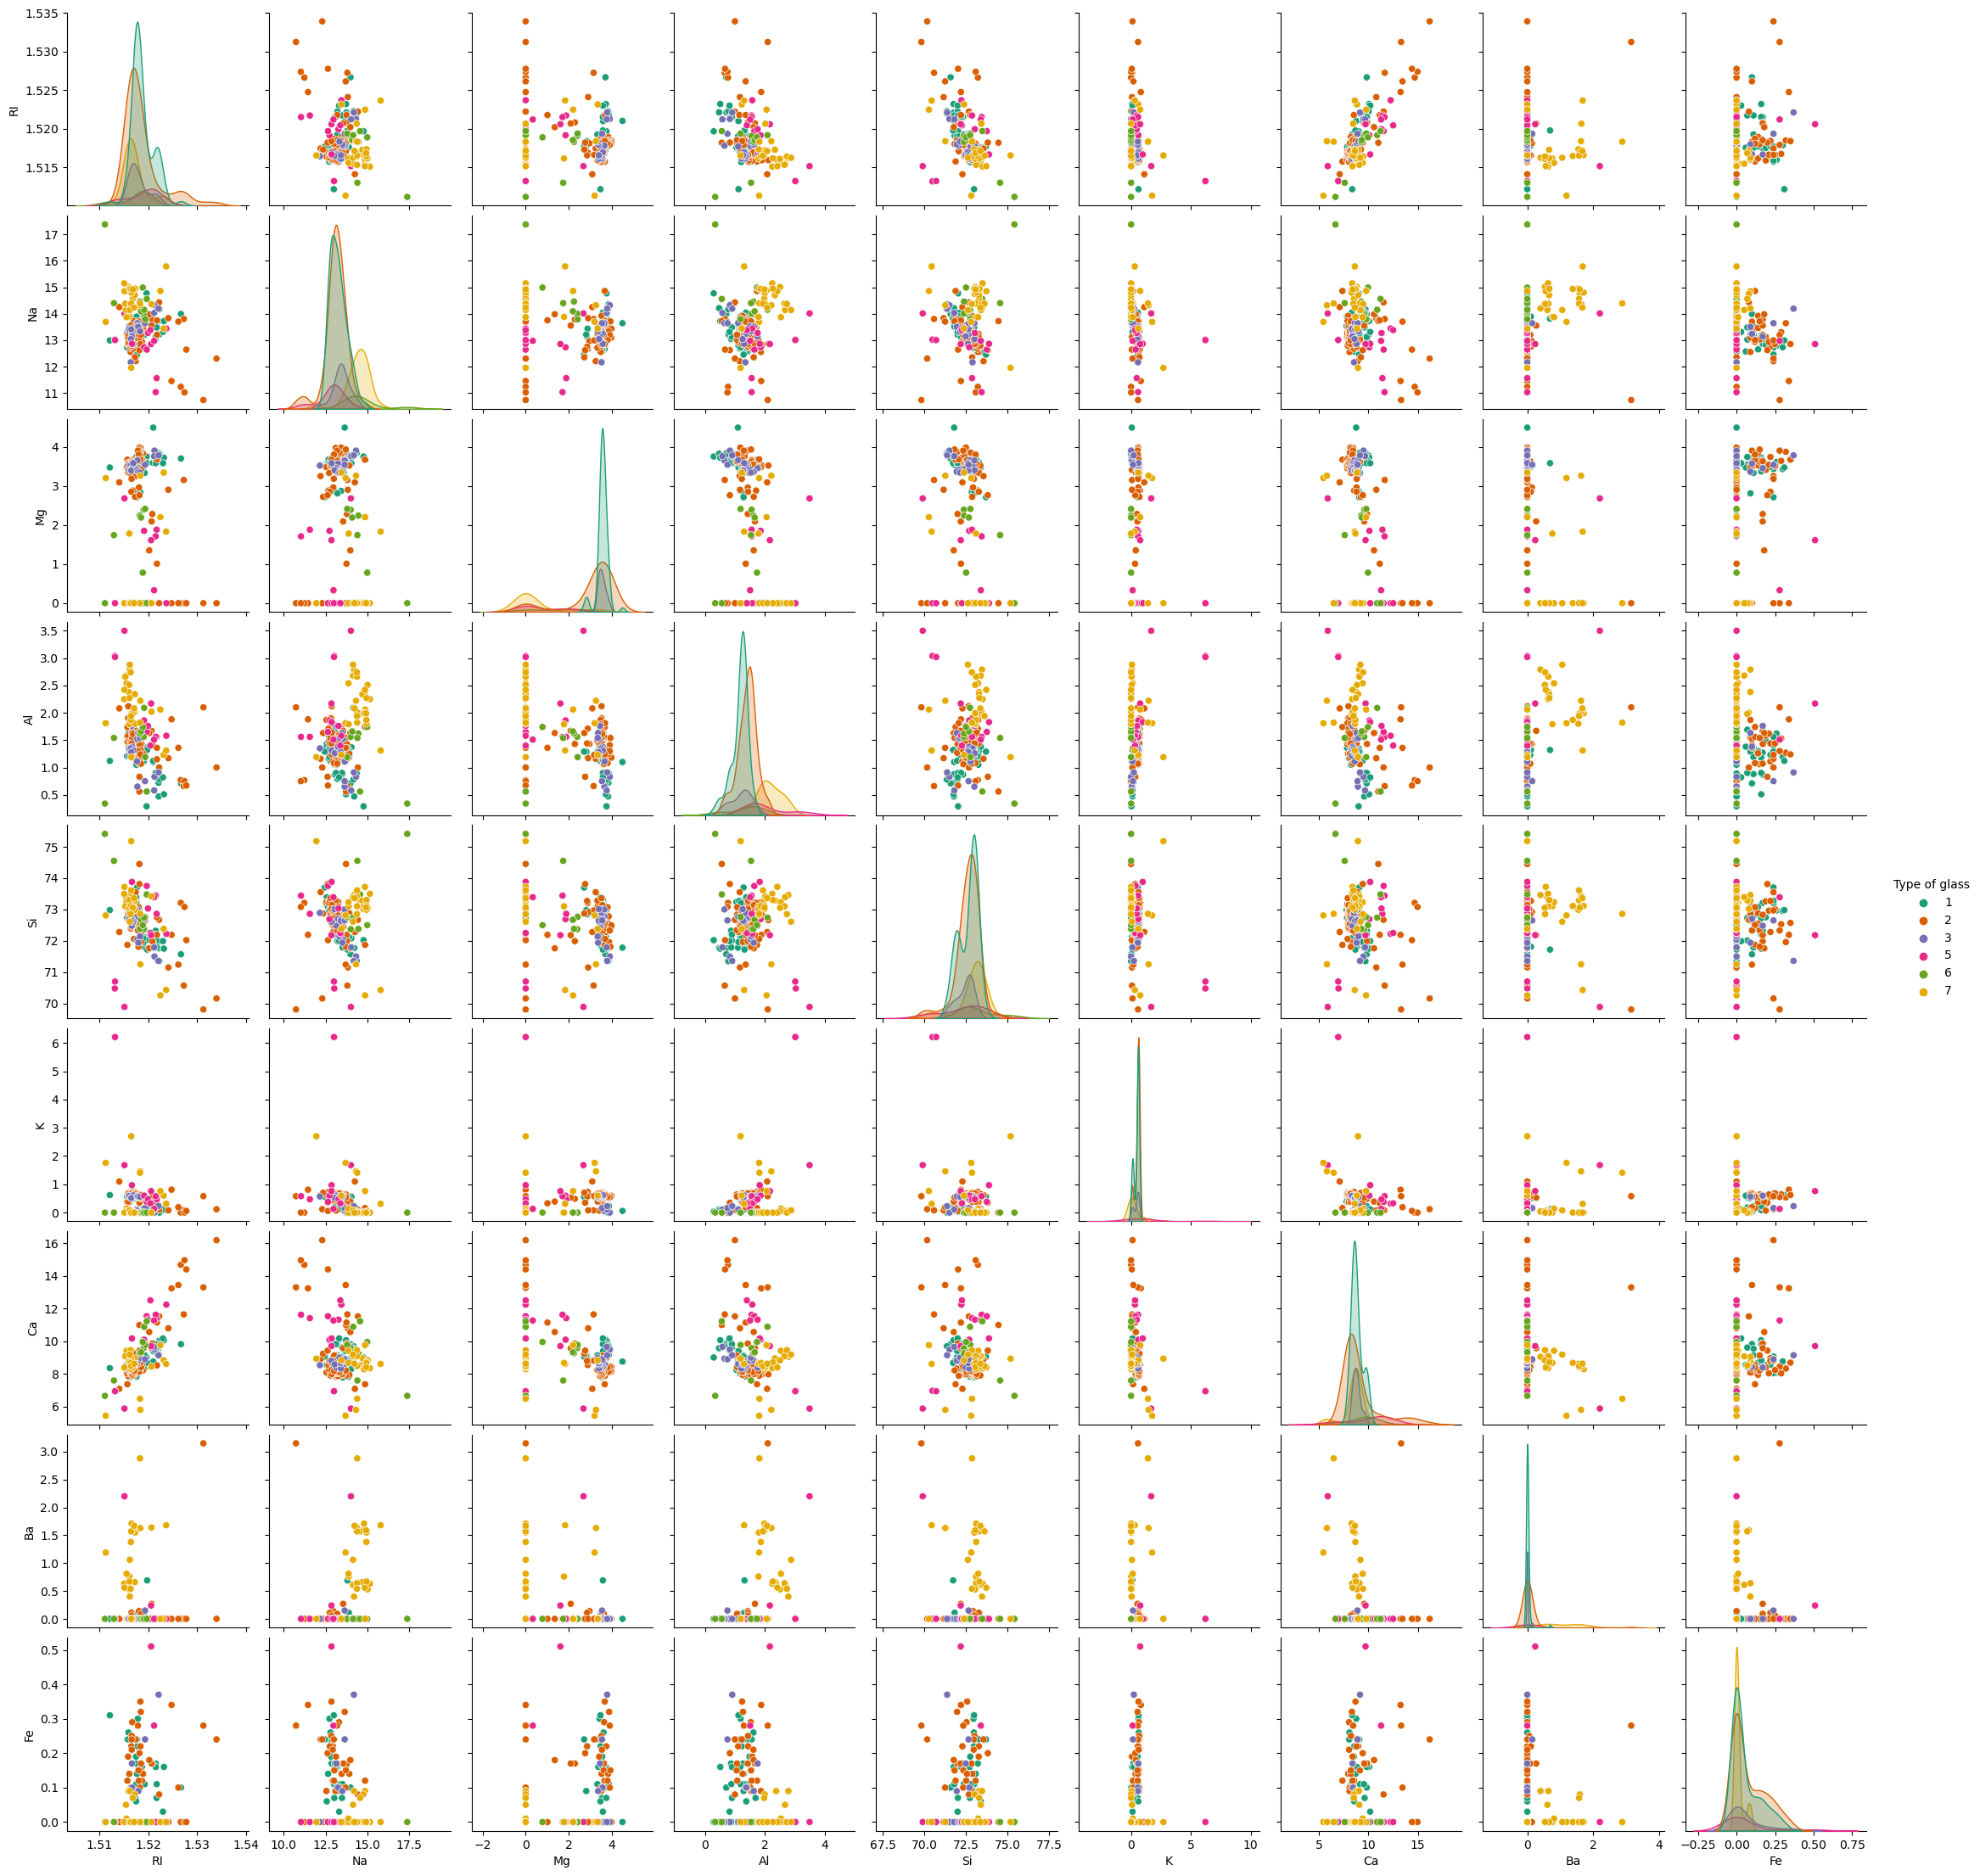

In [21]:
sns.pairplot(df, hue = "Type of glass", palette = "Dark2")
plt.show()

1. The pair plot gives the pairwise relation between the features on the basis of the target "Type of glass". On the diagonal we can notice the distribution plots of feature columns.

2. The features Ri and Ca have strong positive linear relationship. 

3. There is not clear evidence of outliers from this but let's use box plot to identify outliers. 

### Checking for Outliers

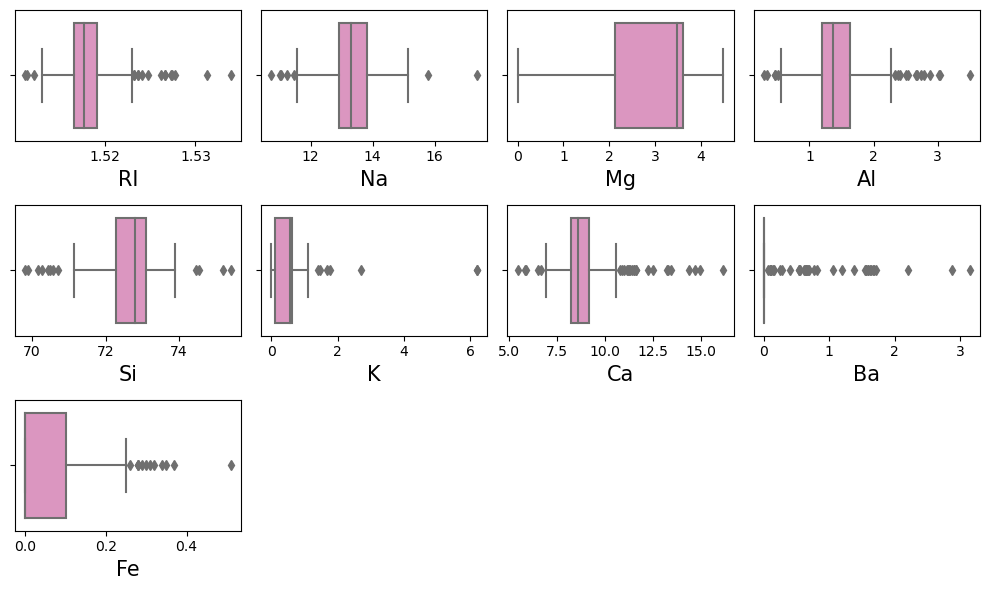

In [22]:
# let's check for outliers by plotting boxplot.
plt.figure(figsize = (10,6), facecolor = "white")
plotnumber = 1

for col in df.columns:
    if plotnumber <= 9:
        ax = plt.subplot(3, 4, plotnumber)
        sns.boxplot(df[col], palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber += 1
    
plt.tight_layout()

From the box plots we can notice that there are outliers present in all features except Mg feature. Now lets deal with outliers.

First, we try to remove outliers by using "zscore method" and check the how much data we are loosing. Accepatable dat loss is 10%. If the data loss is more than 10% then we can't remove outliers, instead we replace them with suitable statistical measure such as mean or median.   

In [23]:
from scipy.stats import zscore
out_features = df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]

z = np.abs(zscore(out_features))
z

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,0.692442,1.127082,0.671705,0.145766,0.352877,0.586451
1,0.249333,0.591817,0.636168,0.170460,0.102319,0.026213,0.793734,0.352877,0.586451
2,0.721318,0.149933,0.601422,0.190912,0.438787,0.164533,0.828949,0.352877,0.586451
3,0.232831,0.242853,0.698710,0.310994,0.052974,0.112107,0.519052,0.352877,0.586451
4,0.312045,0.169205,0.650066,0.411375,0.555256,0.081369,0.624699,0.352877,0.586451
...,...,...,...,...,...,...,...,...,...
209,0.704815,0.898681,1.865511,2.881125,0.052974,0.640968,0.157088,1.783978,0.586451
210,0.500178,1.856097,1.865511,1.094342,0.529374,0.763919,0.392276,2.852405,0.586451
211,0.754046,1.168721,1.865511,1.154570,0.995252,0.763919,0.364103,2.953200,0.586451
212,0.612399,1.193270,1.865511,0.993960,1.241133,0.763919,0.335931,2.812087,0.586451


In [24]:
np.where(z>3)

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
        131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
        188, 189, 201, 201, 203, 207, 213]),
 array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
        5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7]))

In [25]:
z.iloc[105,6]

3.01659640155971

In [26]:
# Now removing the outliers using zscore and creating new data frame to see the percentage of data we lost from removing outliers.
df1 = df[(z<3).all(axis = 1)]

df1.shape

(194, 10)

In [27]:
# Shape of old and new data frame 
print("Old Data Frame: ", df.shape[0])
print("New Data Frame: ", df1.shape[0])

print("Data loss percentage: ", ((df.shape[0]-df1.shape[0])/df.shape[0])*100 )

Old Data Frame:  214
New Data Frame:  194
Data loss percentage:  9.345794392523365


Data loss percentage is within the acceptable range, i.e, less than 10%, so we go ahead with data frame "df1".

In [28]:
df1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


In [29]:
### Converting the target label Type of glass: Classes <= 4 --> 0 -- window, Classes > 4 --> 1 -- non-window 
df1['Type of glass'] = df1['Type of glass'].apply(lambda x: 1 if x > 4 else 0)
df1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0


In [30]:
df1.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
208,1.51640,14.37,0.0,2.74,72.85,0.00,9.45,0.54,0.0,1
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,1
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,1
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,1
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,1


0    154
1     40
Name: Type of glass, dtype: int64


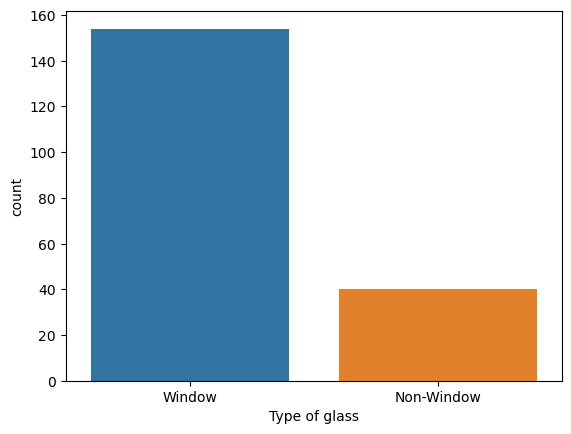

In [31]:
# Visualize the number of window and non-window type glass 
print(df1["Type of glass"].value_counts())
ax = sns.countplot(x = "Type of glass", data = df1)
plt.xticks([0,1],['Window','Non-Window'])
plt.show()

From the above one can observe that there is a class imbalance in Type of glass column. We will rectify this problem using oversampling method later.

### Checking for Skewness

In [32]:
df1.skew()

RI               0.952733
Na               0.371482
Mg              -1.528849
Al               0.658259
Si              -0.425450
K                0.303175
Ca               1.077962
Ba               3.188587
Fe               1.486479
Type of glass    1.463837
dtype: float64

Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. A perfectly symmetrical data set will have a skewness of 0. The normal distribution has a skewness of 0.

The rule of thumb for skewness:
1. If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
2. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed
3. If the skewness is less than -1 or greater than 1, the data are highly skewed

From the above we can see that the features: Mg, Ca, Ba, Fe and Type of glass having high skewness. Let's use cube root method to remove skewness from the "Ba" feature with high skewness among all. 

### Removing Skewness

In [33]:
# Removing skewness using Cuberoot method in "Ba"
df1["Ba"] = np.cbrt(df1["Ba"])
df1.skew()

RI               0.952733
Na               0.371482
Mg              -1.528849
Al               0.658259
Si              -0.425450
K                0.303175
Ca               1.077962
Ba               2.207594
Fe               1.486479
Type of glass    1.463837
dtype: float64

We have now removed skewness from the "Ba" feature using Cube root method, however there is still skewness present in Ba. So, we apply apply repeatedly apply cuberoot method on features with high skewness to reduce skewness or try to find a best method which works well for this data set.

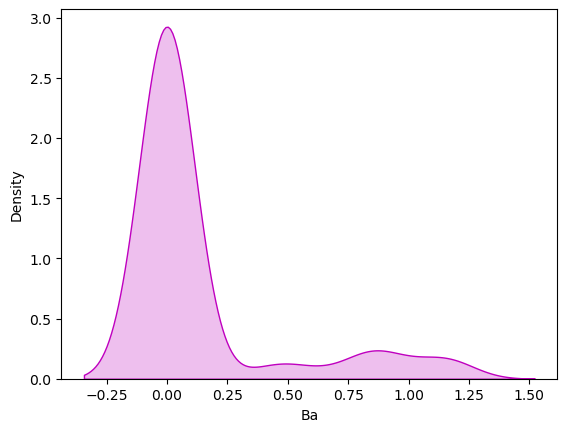

In [34]:
# Let's visualize how the data has been distributed in Ba after removing skewness
sns.distplot(df1["Ba"], color = "m", kde_kws = {"shade":True}, hist = False)
plt.show()

In [35]:
# Removing skewness using Cuberoot method in "Ba"
df1["Ba"] = np.cbrt(df1["Ba"])
df1.skew()

RI               0.952733
Na               0.371482
Mg              -1.528849
Al               0.658259
Si              -0.425450
K                0.303175
Ca               1.077962
Ba               1.923662
Fe               1.486479
Type of glass    1.463837
dtype: float64

In [36]:
# Removing skewness using Cuberoot method
df1["Fe"] = np.cbrt(df1["Fe"])
df1.skew()

RI               0.952733
Na               0.371482
Mg              -1.528849
Al               0.658259
Si              -0.425450
K                0.303175
Ca               1.077962
Ba               1.923662
Fe               0.883166
Type of glass    1.463837
dtype: float64

In [37]:
# Removing skewness using Cuberoot method
df1["Ca"] = np.cbrt(df1["Ca"])
df1.skew()

RI               0.952733
Na               0.371482
Mg              -1.528849
Al               0.658259
Si              -0.425450
K                0.303175
Ca               0.611914
Ba               1.923662
Fe               0.883166
Type of glass    1.463837
dtype: float64

In [38]:
# Removing skewness using Cuberoot method
df1["Mg"] = np.cbrt(df1["Mg"])
df1.skew()

RI               0.952733
Na               0.371482
Mg              -1.899050
Al               0.658259
Si              -0.425450
K                0.303175
Ca               0.611914
Ba               1.923662
Fe               0.883166
Type of glass    1.463837
dtype: float64

In [39]:
# Removing skewness using Cuberoot method
df1["Ba"] = np.cbrt(df1["Ba"])
df1.skew()

RI               0.952733
Na               0.371482
Mg              -1.899050
Al               0.658259
Si              -0.425450
K                0.303175
Ca               0.611914
Ba               1.877873
Fe               0.883166
Type of glass    1.463837
dtype: float64

In [40]:
# Removing skewness using Cuberoot method
df1["Ba"] = np.cbrt(df1["Ba"])
df1.skew()

RI               0.952733
Na               0.371482
Mg              -1.899050
Al               0.658259
Si              -0.425450
K                0.303175
Ca               0.611914
Ba               1.872184
Fe               0.883166
Type of glass    1.463837
dtype: float64

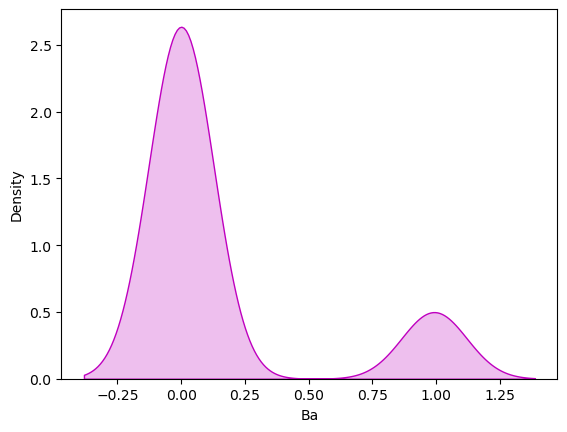

In [41]:
# Let's visualize how the data has been distributed in residual sugar after removing skewness
sns.distplot(df1["Ba"], color = "m", kde_kws = {"shade":True}, hist = False)
plt.show()

By applying the cuberoot method number of times on few features which are having high skewness, finally we reduced skewness in the data set. Still Ba feature is showing high skewness and we can not reduce the skewness further. Further, the Type of glass label have high skewness but this label is representing two categories. hence, we don't need to worry about it. 

### Correlation between target and feature (independent) variables

In [42]:
# Checking correlation between features and the target
cor = df1.corr()
cor

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
RI,1.000000,0.050760,0.063399,-0.522197,-0.609011,-0.368238,0.690592,-0.216270,0.016214,-0.060410
Na,0.050760,1.000000,-0.526123,0.253127,-0.234718,-0.612183,0.017997,0.484576,-0.160878,0.463723
Mg,0.063399,-0.526123,1.000000,-0.580115,-0.362193,0.494707,-0.389151,-0.585411,0.110677,-0.800158
Al,-0.522197,0.253127,-0.580115,1.000000,0.335262,0.005827,-0.222137,0.558001,-0.083982,0.600752
Si,-0.609011,-0.234718,-0.362193,0.335262,1.000000,0.072579,-0.160134,0.180307,0.002445,0.282746
K,-0.368238,-0.612183,0.494707,0.005827,0.072579,1.000000,-0.526657,-0.270760,0.052307,-0.396495
Ca,0.690592,0.017997,-0.389151,-0.222137,-0.160134,-0.526657,1.000000,-0.120448,0.013133,0.266319
Ba,-0.216270,0.484576,-0.585411,0.558001,0.180307,-0.270760,-0.120448,1.000000,0.029944,0.547758
Fe,0.016214,-0.160878,0.110677,-0.083982,0.002445,0.052307,0.013133,0.029944,1.000000,-0.195054
Type of glass,-0.060410,0.463723,-0.800158,0.600752,0.282746,-0.396495,0.266319,0.547758,-0.195054,1.000000


This gives the correlation between dependent and independent variables. We can visualize it by plotting heatmap.

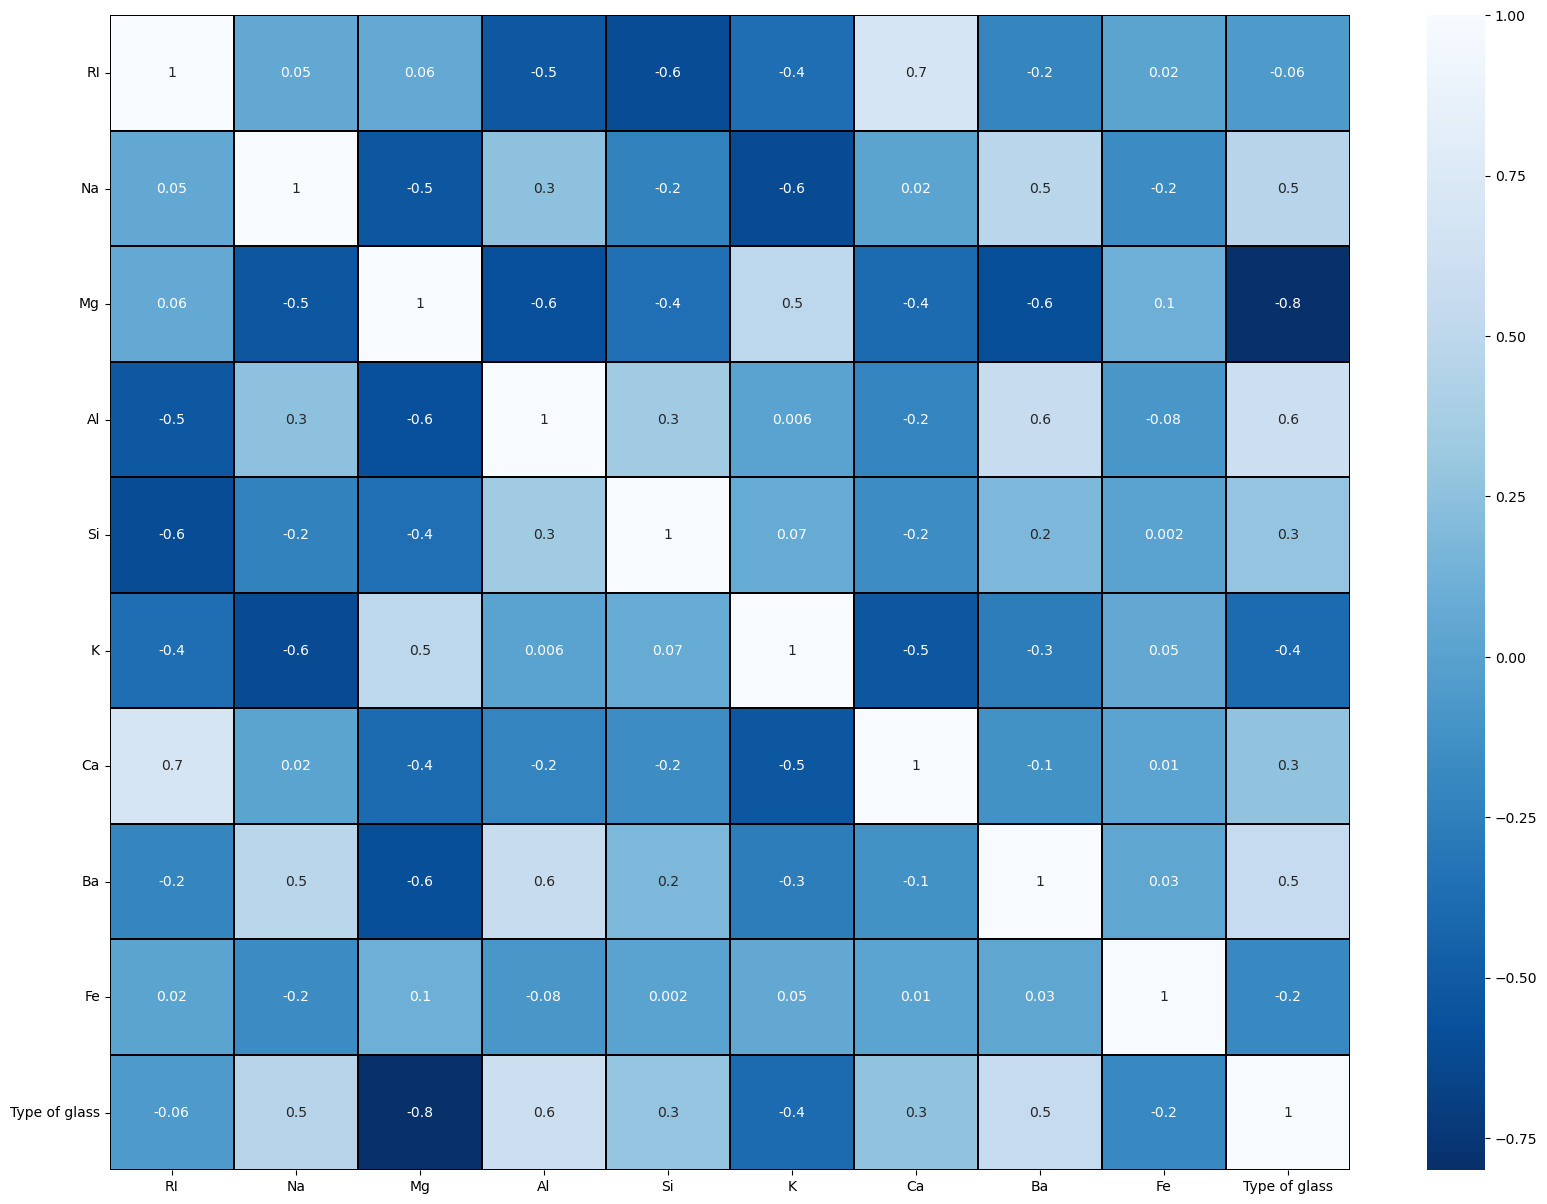

In [43]:
# Visualizing the correlation matrix by plotting heatmap

plt.figure(figsize = (20,15))
sns.heatmap(df1.corr(), linewidths = 0.1, fmt = ".1g", linecolor = "black", annot = True, cmap = "Blues_r")
plt.yticks(rotation = 0)
plt.show()

The heatmap shows the correlation matrix in a visual mode. We can observe the relation between feature to feature and feature to target label. Correlation value (r) lies between -1 and 1. -1 <= r <= 1. 
Positive correlation --- 0 < r <= 1
Negative correlation --- -1 <= r < 0

r = 0 - No correlation, -0.3 <= r <= 0.3 -- less correlation, r < - 0.5 or r > 0.5 -- moderate correlation, r < -0.7 or r > 0.7 -- high correlation

1. Features Ri and Ca shows a  positive correlation with each other.

2. Feature Mg shows strong negative correlation with the target label Type of glass and features Al, Ba, Na, Si and Ca shows positive corelation with the target label.

In [44]:
# Checking correlation values of target label

cor["Type of glass"].sort_values(ascending = False)

Type of glass    1.000000
Al               0.600752
Ba               0.547758
Na               0.463723
Si               0.282746
Ca               0.266319
RI              -0.060410
Fe              -0.195054
K               -0.396495
Mg              -0.800158
Name: Type of glass, dtype: float64

We can observe the positively and negatively correlated features with the target label.

### Visualize the correlation between label and features using bar plot

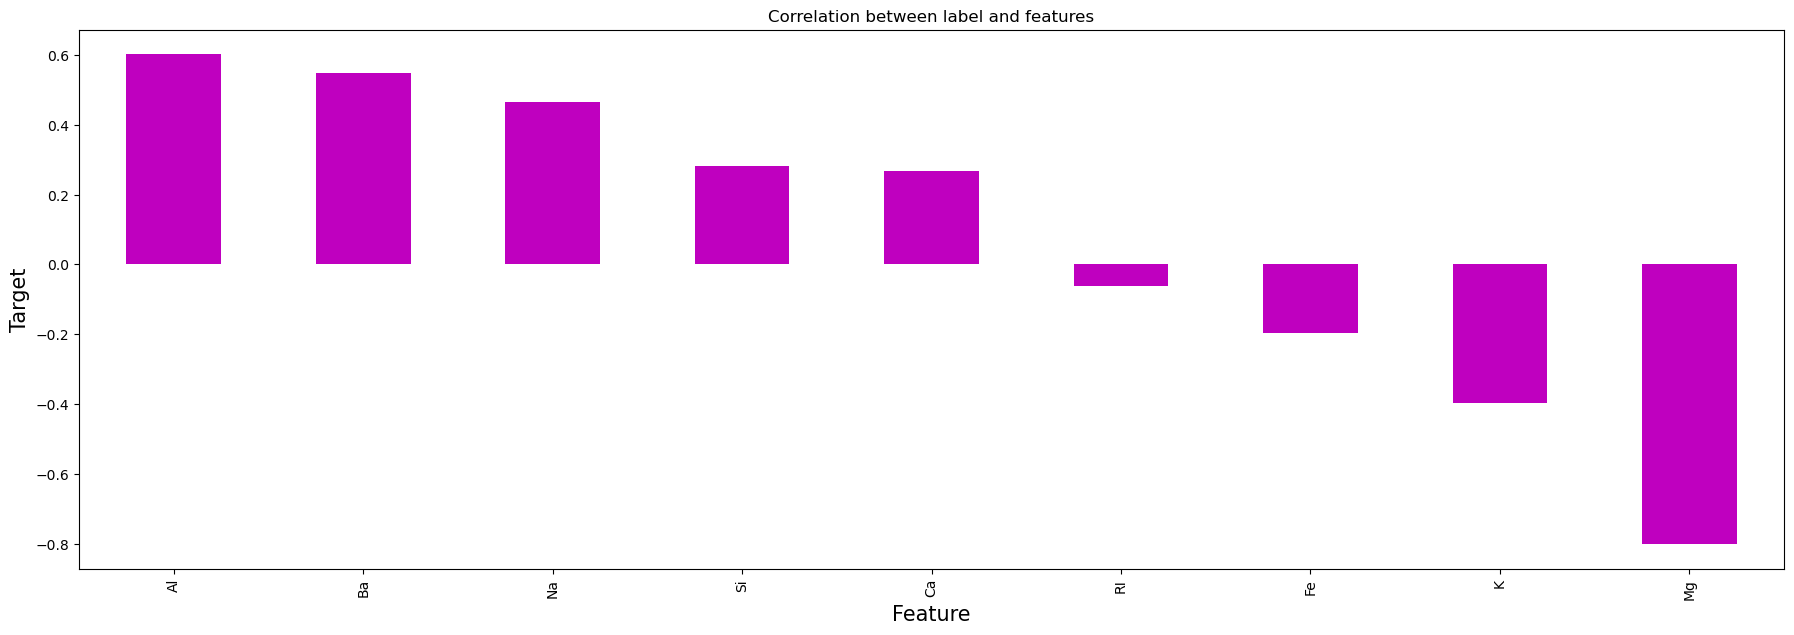

In [45]:
plt.figure(figsize = (22, 7))
df1.corr()["Type of glass"].sort_values(ascending = False).drop(["Type of glass"]).plot(kind = "bar", color = "m")
plt.xlabel("Feature", fontsize = 15)
plt.ylabel("Target", fontsize = 15)
plt.title("Correlation between label and features")
plt.show()

From the above bar plot we can easily notice that which features are positively or negatively correlated with the target label. Here the feature Ri is having very less negative correlation with the label and Al having high positive correlation with the target label.

### Separating features and label

In [46]:
X = df1.drop("Type of glass", axis = 1)
y = df1["Type of glass"]

### Feature Scaling using Standard Scalarization

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.291781,0.332127,0.700169,-0.729105,-1.612464,-1.319609,-0.041137,-0.436062,-0.67803
1,-0.197832,0.704398,0.481196,-0.141722,0.016082,0.172091,-1.038165,-0.436062,-0.67803
2,-0.824346,0.168328,0.467868,0.264928,0.461790,-0.147559,-1.094542,-0.436062,-0.67803
3,-0.175926,-0.308179,0.504878,-0.299864,-0.189629,0.491741,-0.606457,-0.436062,-0.67803
4,-0.281075,-0.218834,0.486492,-0.412822,0.616073,0.420708,-0.770849,-0.436062,-0.67803
...,...,...,...,...,...,...,...,...,...
189,-0.727959,1.419158,-2.384242,2.975928,0.221793,-1.532708,0.671549,2.293261,-0.67803
190,-0.802440,1.076668,-2.384242,3.292211,-0.189629,-1.248575,0.400966,2.316082,-0.67803
191,-0.530805,2.238153,-2.384242,1.281553,0.581788,-1.532708,-0.411806,2.329893,-0.67803
192,1.134057,1.404267,-2.384242,1.349328,1.198921,-1.532708,-0.368929,2.330951,-0.67803


We have scaled/normalized the data using Standard Scalarization method to overcome the issue of biasness.

### Checking for Multi-collinearity using Variance Inflation Factor (VIF)

In [48]:
# Finding variance inflation factor in each scaled columns i.e, X

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif["Features"] = X.columns

vif

,VIF values,Features
0,5.028583,RI
1,7.290800,Na
2,11.701845,Mg
3,3.550406,Al
4,5.310080,Si
5,3.887151,K
6,7.898720,Ca
7,2.331344,Ba
8,1.074045,Fe


Variance Inflation Factor (VIF) is used to detect the presence of multicollinearity. Multicollinearity exists when there is a correlation between multiple independent variables.

VIF = 1/(1-R^2)

By checking VIF values we can find that the features are causing multicollinearity problem. The threshold VIF value is 10. Here we can see that all features have VIF value less than 10 which menas that there is no multicolliniarity problem in the data set.

Here we can see that feature Mg have VIF value greater than 10 which means that it has high correlation with other features. We will drop the column with high VIF value first and check again for VIF values to see multicollinearity exist further.

In [49]:
# Dropping Mg column
X.drop("Mg", axis = 1, inplace = True)

In [50]:
# Again checking VIF values to confirm whether multicollinearity still exists or not
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif["Features"] = X.columns

vif

,VIF values,Features
0,4.971213,RI
1,3.101783,Na
2,2.158942,Al
3,2.589203,Si
4,3.210657,K
5,3.232500,Ca
6,1.981771,Ba
7,1.071810,Fe


By dropping the column with highest VIF value that is Mg column, we have solved multicollinearity problem. We can now move ahead for model building.

### Feature sampling
Before model building, we need to do one more thing. As we noticed earlier the target label values are not balanced. We need to make balance using Oversampling method.

In [51]:
y.value_counts()

0    154
1     40
Name: Type of glass, dtype: int64

Here, we can see that data is imbalanced, since it is a classification problem we will balance the data using Oversampling method.

### Oversampling

In [52]:
# Oversampling the data 
# !pip install imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X1, y1 = sm.fit_resample(X,y)

In [53]:
# Checking value counts of target column
y.value_counts()

0    154
1     40
Name: Type of glass, dtype: int64

In [54]:
y1.value_counts()

0    154
1    154
Name: Type of glass, dtype: int64

### Applying Machine Learning Algorithm (Modelling)

The random state is used in many machine learning algorithms, including train-test split. The random state is used to shuffle the data before splitting it into a training set and a test set.

1. None: This is the default value. This allows the function to use the global random state instance from np.random . If you call the same function multiple times with random_state=None, that function will produce different results across different executions.

2. int: We can use an integer for random_state . Yes! We can use any integer including 0, but not negative ones, only positive integers. The most popular integers are 0 and 42. When we use an integer for random_state, the function will produce the same results across different executions. The results are only changed if we change the integer value.

#### Finding the best random state

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


maxAccu = 0
bestRS = 0

for i in range(1,250):
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.30, random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(X_train, y_train)
    
    pred = RFR.predict(X_test)
    accu = accuracy_score(y_test, pred)
    if accu > maxAccu:
        maxAccu = accu
        bestRS = i
        
print("Best accuracy is: ", maxAccu, "obtained at random_state: ", bestRS)

Best accuracy is:  1.0 obtained at random_state:  8


### Creating train test data split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.30, random_state = bestRS)

### Classification ML Algorithms

In [57]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

### Random Forest Classifier

In [58]:
# Checking accuracy of RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
predRFC = RFC.predict(X_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

print("\n The accuracy of Random forest classifier is: ",round(accuracy_score(y_test, predRFC)*100,2))

1.0
[[49  0]
 [ 0 44]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        44

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93


 The accuracy of Random forest classifier is:  100.0


### Logistic Regression

In [59]:
# Checking accuracy of LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
predLR = LR.predict(X_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

print("\n The accuracy of LogisticRegression classifier is: ",round(accuracy_score(y_test, predLR)*100,2))

1.0
[[49  0]
 [ 0 44]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        44

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93


 The accuracy of LogisticRegression classifier is:  100.0


### Support Vector Machine Classifier (SVC)

In [60]:
# Checking accuracy of Support Vector Machine Classifier
svc = SVC()
svc.fit(X_train, y_train)
predsvc = svc.predict(X_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

print("\n The accuracy score using SVC is: ",round(accuracy_score(y_test, predsvc)*100,2))

1.0
[[49  0]
 [ 0 44]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        44

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93


 The accuracy score using SVC is:  100.0


### Gradient Boosting Classifier

In [61]:
# Checking accuracy of Gradient Boosting Classifier
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)
predGBC = GBC.predict(X_test)

print(accuracy_score(y_test, predGBC))
print(confusion_matrix(y_test, predGBC))
print(classification_report(y_test, predGBC))

print("\n The accuracy of Gradient Boosting Classifier is: ",round(accuracy_score(y_test, predGBC)*100,2))

1.0
[[49  0]
 [ 0 44]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        44

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93


 The accuracy of Gradient Boosting Classifier is:  100.0


### AdaBoost Classifier

In [62]:
# Checking accuracy of AdaBoost Classifier
ABC = AdaBoostClassifier()
ABC.fit(X_train, y_train)
predABC = ABC.predict(X_test)

print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test, predABC))

print("\n The accuracy of AdaBoost Classifier is: ",round(accuracy_score(y_test, predABC)*100,2))

1.0
[[49  0]
 [ 0 44]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        44

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93


 The accuracy of AdaBoost Classifier is:  100.0


### BaggingClassifier

In [63]:
# Checking accuracy of BaggingClassifier
BC = BaggingClassifier()
BC.fit(X_train, y_train)
predBC = BC.predict(X_test)

print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test, predBC))
print(classification_report(y_test, predBC))

print("\n The accuracy of BaggingClassifier is: ",round(accuracy_score(y_test, predBC)*100,2))

0.989247311827957
[[48  1]
 [ 0 44]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        49
           1       0.98      1.00      0.99        44

    accuracy                           0.99        93
   macro avg       0.99      0.99      0.99        93
weighted avg       0.99      0.99      0.99        93


 The accuracy of BaggingClassifier is:  98.92


### ExtraTreesClassifier

In [64]:
# Checking accuracy of ExtraTreesClassifier
ET = ExtraTreesClassifier()
ET.fit(X_train, y_train)
predET = ET.predict(X_test)

print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

print("\n The accuracy of ExtraTreesClassifier is: ",round(accuracy_score(y_test, predET)*100,2))

1.0
[[49  0]
 [ 0 44]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        44

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93


 The accuracy of ExtraTreesClassifier is:  100.0


From the above we can observe that the accuracy of all models is 100% except Bagging Classifier model. However we will now use Cross validation to decide the best model among them.

### Cross Validation Score

In [65]:
from sklearn.model_selection import cross_val_score

cv = 5 --- it's a fold value 1, 2, 3, 4, 5 -- default value for cv is 5 

cross_val_score(modelname, features, targetlabel, cv = foldvalue, scoring = "accuracy")

In Classification algorithms -- default scoring parameter is accuracy

In Regression models -- default scoring parameter is r2 score

In [66]:
# Checking cv score for Random Forest Classifier
score = cross_val_score(RFC,X1,y1,cv=10)
print(score)
print(score.mean())

print("Difference b/w accuracy and cross validation scores is: ", accuracy_score(y_test, predRFC) - score.mean())

[1.         0.96774194 1.         1.         1.         0.96774194
 0.93548387 1.         0.96666667 1.        ]
0.983763440860215
Difference b/w accuracy and cross validation scores is:  0.016236559139784945


In [67]:
# Checking cv score for Logistic Regression
score = cross_val_score(LR,X1,y1,cv=10)
print(score)
print(score.mean())

print("Difference b/w accuracy and cross validation scores is: ", accuracy_score(y_test, predLR) - score.mean())

[0.93548387 0.90322581 0.96774194 0.93548387 0.93548387 0.93548387
 0.90322581 0.96774194 0.93333333 1.        ]
0.9417204301075269
Difference b/w accuracy and cross validation scores is:  0.05827956989247307


In [68]:
# Checking cv score for Gradient Boosting Classifier
score = cross_val_score(GBC,X1,y1,cv=10)
print(score)
print(score.mean())

print("Difference b/w accuracy and cross validation scores is: ", accuracy_score(y_test, predGBC) - score.mean())

[1.         0.93548387 1.         1.         1.         0.93548387
 0.93548387 0.96774194 0.93333333 1.        ]
0.970752688172043
Difference b/w accuracy and cross validation scores is:  0.029247311827957034


In [69]:
# Checking cv score for Support Vector Machine Classifier
score = cross_val_score(svc,X1,y1,cv=10)
print(score)
print(score.mean())

print("Difference b/w accuracy and cross validation scores is: ", accuracy_score(y_test, predsvc) - score.mean())

[1.         0.96774194 1.         1.         1.         0.96774194
 0.93548387 1.         0.96666667 1.        ]
0.983763440860215
Difference b/w accuracy and cross validation scores is:  0.016236559139784945


In [70]:
# Checking cv score for AdaBoost Classifier
score = cross_val_score(ABC,X1,y1,cv=10)
print(score)
print(score.mean())

print("Difference b/w accuracy and cross validation scores is: ", accuracy_score(y_test, predABC) - score.mean())

[1.         0.93548387 1.         0.96774194 1.         0.87096774
 0.93548387 1.         0.96666667 0.96666667]
0.9643010752688171
Difference b/w accuracy and cross validation scores is:  0.03569892473118286


In [71]:
# Checking cv score for Bagging Classifier
score = cross_val_score(BC,X1,y1,cv=10)
print(score)
print(score.mean())

print("Difference b/w accuracy and cross validation scores is: ", accuracy_score(y_test, predBC) - score.mean())

[1.         0.90322581 1.         1.         0.96774194 0.96774194
 0.83870968 1.         0.96666667 0.96666667]
0.9610752688172044
Difference b/w accuracy and cross validation scores is:  0.0281720430107526


In [72]:
# Checking cv score for Extra Trees Classifier
score = cross_val_score(ET,X1,y1,cv=10)
print(score)
print(score.mean())

print("Difference b/w accuracy and cross validation scores is: ", accuracy_score(y_test, predET) - score.mean())

[1.         0.96774194 1.         1.         1.         0.96774194
 0.96774194 1.         0.96666667 1.        ]
0.9869892473118279
Difference b/w accuracy and cross validation scores is:  0.01301075268817209


From the above models, we can observe that  Extra Tree Classifier, Random Forest Classifier and Support Vector Machine Classifier are producing  best results as the difference between accuracy and cross validation scores is least for these three models. Among these three best models, we can select Extra Trees Classification model as our best model beacuse the difference between accuracy and cross validation score is least for this model.

### Hyper Parameter Tuning

In [73]:
# ExtraTrees Classifier

from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ['gini', 'entropy'],
              'random_state' : [10, 50, 1000],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [50, 100, 200, 300]}

In [74]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv = 10)

In [75]:
GCV.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [77]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 1000}

In [78]:
Best_model = ExtraTreesClassifier(criterion = 'entropy', max_depth = 10, n_estimators = 100, n_jobs = -2, random_state = 1000)
Best_model.fit(X_train, y_train)

pred = Best_model.predict(X_test)
accu = accuracy_score(y_test, pred)
print(accu*100)

100.0


We can see that the accuracy score of ExtraTrees Classifier is 100% which is maximum.

### Plotting ROC and compare AUC for all the models used

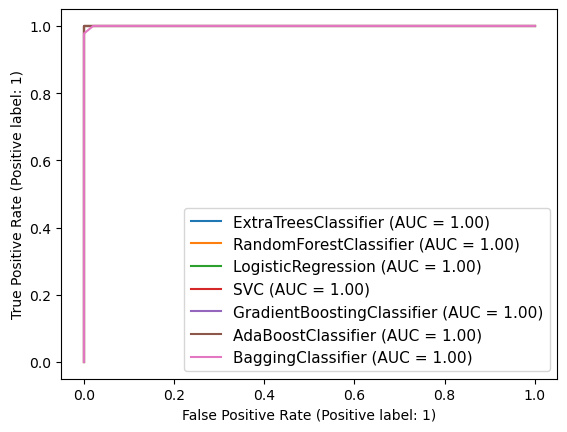

In [79]:
# Following method is deprecated so don't use in future.
# Plotting for all the models used here
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(ET, X_test, y_test)  # ax_ = Axes with confusion matrix
plot_roc_curve(RFC, X_test, y_test, ax = disp.ax_)
plot_roc_curve(LR, X_test, y_test, ax = disp.ax_)
plot_roc_curve(svc, X_test, y_test, ax = disp.ax_)
plot_roc_curve(GBC, X_test, y_test, ax = disp.ax_)
plot_roc_curve(ABC, X_test, y_test, ax = disp.ax_)
plot_roc_curve(BC, X_test, y_test, ax = disp.ax_)

plt.legend(prop = {'size': 11}, loc = 'lower right')
plt.show()

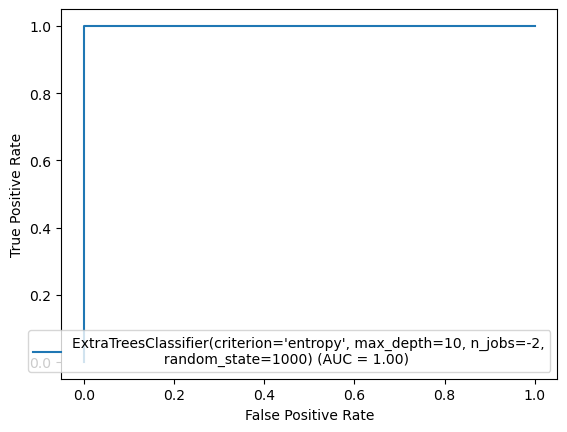

In [80]:
# Plotting ROC for the best model

from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = Best_model)
display.plot()

Here, we have plotted the ROC curve for the best model and the AUC value for the best model is 100%.

### Saving the model 

In [81]:
# Saving the best model using .pkl
import joblib
joblib.dump(Best_model, "Glass_Identification.pkl")

['Glass_Identification.pkl']

### Predicting the saved model

In [82]:
# Let's load the saved model and get the predictions
model = joblib.load("Glass_Identification.pkl")

# Prediction
prediction = model.predict(X_test)
prediction

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0])

These are the predicted values of the type of glass.

In [83]:
a = np.array(y_test)
df_com = pd.DataFrame()
df_com["Predicted"] = prediction
df_com["Original"] = a

df_com

,Predicted,Original
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
88,0,0
89,1,1
90,1,1
91,0,0


The above data shows the predicted and actual type of glass. 0 represents Window type glass and 1 represents Non-Window type glass.